### TELEOME CHURN CASE STUDY 

#### GROUP FACILIATOR - ANKIT GUPTA
#### GROUP MEMBER - RITUPARNA TRIPATHY

### Problem Statement
#### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#  Importing Required Libraries and Dataset

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Import the dataset
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# check the shape of data
df.shape

(99999, 226)

In [6]:
# check the info of data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
# check the describe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
df.shape

(99999, 226)

In [9]:
# Percentage of missing values in application data
per_mis = (100*df.isnull().sum()/len(df)).round(2)
print(per_mis)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [10]:
# check for meaningfull missing 
df1 = pd.DataFrame(df,columns=['date_of_last_rech_6','last_day_rch_amt_6','total_rech_num_6'])
df1.isnull().sum()

date_of_last_rech_6    1607
last_day_rch_amt_6        0
total_rech_num_6          0
dtype: int64

In [11]:
df1 = pd.DataFrame(df,columns=['date_of_last_rech_7','last_day_rch_amt_7','total_rech_num_7'])
df1.isnull().sum()

date_of_last_rech_7    1767
last_day_rch_amt_7        0
total_rech_num_7          0
dtype: int64

In [12]:
df1 = pd.DataFrame(df,columns=['date_of_last_rech_8','last_day_rch_amt_8','total_rech_num_8'])
df1.isnull().sum()

date_of_last_rech_8    3622
last_day_rch_amt_8        0
total_rech_num_8          0
dtype: int64

In [13]:
df1 = pd.DataFrame(df,columns=['date_of_last_rech_9','last_day_rch_amt_9','total_rech_num_9'])
df1.isnull().sum()

date_of_last_rech_9    4760
last_day_rch_amt_9        0
total_rech_num_9          0
dtype: int64

so we can see that some values of date column is missing so we can impute  these rows by mode 

In [14]:
##  as these columns are categorical so we can impute them  with mode 

df['date_of_last_rech_6'].fillna((df['date_of_last_rech_6'].mode()[0]), inplace=True)
df['date_of_last_rech_7'].fillna((df['date_of_last_rech_7'].mode()[0]), inplace=True)
df['date_of_last_rech_8'].fillna((df['date_of_last_rech_8'].mode()[0]), inplace=True)
df['date_of_last_rech_9'].fillna((df['date_of_last_rech_9'].mode()[0]), inplace=True)

In [15]:
# check the missing values 
per_mis1 = (100*df.isnull().sum()/len(df)).round(2)
print(per_mis1)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [16]:
# drop of high percentage column that is greater than 35%
mis_col = list(per_mis[per_mis.values>=35.00].index)

df.drop(labels=mis_col,axis=1,inplace=True)

In [17]:
# check the shape again 
df.shape

(99999, 186)

now we have left with 186 columns 

In [18]:
# check for categorical columns 
df.nunique()

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

so we have seen that there are some categorical columns in the data 

we also seen that there are some columns with only one unique value so we remove those columns

In [19]:
## drop unique value column
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','std_ic_t2o_mou_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], 1)

In [20]:
df.shape

(99999, 170)

In [21]:
# check the missing values 
per_mis1 = (100*df.isnull().sum()/len(df)).round(2)
print(per_mis1)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8    

In [22]:
## impute missing observation with median 
missing_cols = df.columns[df.isnull().sum()>0]
for col in missing_cols:
    df[col].fillna((df[col].median()), inplace=True)

In [23]:
df.isnull().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0


In [24]:
# convert this object type column into datetime 
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day
df['date_of_last_rech_9'] = pd.to_datetime(df.date_of_last_rech_9).dt.day

now we dont have any missing value so lets go ahead 

## filter high value customer

so we can filter high value customer only from 6 and 7 month

step1: calculate average recharge amount in 6 and 7 month


In [25]:
avg_rech_amt_6_7 =  (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [26]:
df['avg_rech_amt_6_7'] = avg_rech_amt_6_7

step2: we can find 70 percentile value of avg_rech_amt_6_7


In [27]:
qant_70 = df['avg_rech_amt_6_7'].quantile(q=0.7)
qant_70

368.5

step3  : filter HVC 

In [28]:
HVC_70 = df[df['avg_rech_amt_6_7'] >= qant_70]
HVC_70.shape

(30011, 171)

In [29]:
df = HVC_70

## DERIVE CHURN OR TARGET VARIBLE (y)

#### 9 month is our churn phase

In [30]:
df['total_usage_col'] =df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']

df['churn'] = np.where(df['total_usage_col']== 0, 1, 0)
df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [31]:
# drop column which are not used 
df.drop(['avg_rech_amt_6_7','total_usage_col'],inplace=True,axis = 1)

In [32]:
# drop 9 month column as we use it as target variable
nine_col = [col for col in df.columns if '_9' in col]
print(df.shape)

(30011, 171)


In [33]:
df = df.drop(nine_col,axis=1)

In [34]:
df.shape

(30011, 130)

In [35]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 130 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mobile_number        int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   onnet_mou_6          float64
 5   onnet_mou_7          float64
 6   onnet_mou_8          float64
 7   offnet_mou_6         float64
 8   offnet_mou_7         float64
 9   offnet_mou_8         float64
 10  roam_ic_mou_6        float64
 11  roam_ic_mou_7        float64
 12  roam_ic_mou_8        float64
 13  roam_og_mou_6        float64
 14  roam_og_mou_7        float64
 15  roam_og_mou_8        float64
 16  loc_og_t2t_mou_6     float64
 17  loc_og_t2t_mou_7     float64
 18  loc_og_t2t_mou_8     float64
 19  loc_og_t2m_mou_6     float64
 20  loc_og_t2m_mou_7     float64
 21  loc_og_t2m_mou_8     float64
 22  loc_og_t2f_mou_6     float64
 23  loc_og_t2f_mou_7     float64
 24  l

## Churn rate

In [36]:
y = df['churn']
churn_rate = (sum(y)/len(y.index))*100
print(churn_rate)
print(df.shape)


8.64016527273333
(30011, 130)


so the churn rate is 8.64 percent 

## DATA PREPARATION

In [37]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27,25,26,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,25,31,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,20,22,30,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00

#### Derived new features which are help for better prediction 


we can derive total roaming monthly usage 

In [38]:
df['total_roam_mou_6']  = df['roam_ic_mou_6'] + df['roam_og_mou_6']
df['total_roam_mou_7']  = df['roam_ic_mou_7'] + df['roam_og_mou_7']
df['total_roam_mou_8']  = df['roam_ic_mou_8'] + df['roam_og_mou_8']

another new feature we derive is total monthy usage of local calls in june july and august

In [39]:
df['total_loc_mou_6'] = df['loc_og_mou_6'] + df['loc_ic_mou_6']
df['total_loc_mou_7'] = df['loc_og_mou_7'] + df['loc_ic_mou_7']
df['total_loc_mou_8'] = df['loc_og_mou_8'] + df['loc_ic_mou_8']

## EDA

## univariate analysis

In [40]:
def uni_2(var1,var2,var3):

    sns.distplot(df[var1],hist=False,label='month6')
    sns.distplot(df[var2],hist=False,label='month7')
    sns.distplot(df[var3],hist=False,label='month8')

    plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
    plt.show()

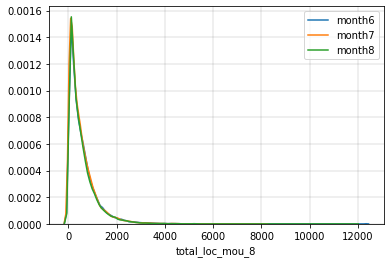

In [41]:
uni_2('total_loc_mou_6','total_loc_mou_7','total_loc_mou_8')

here we can see that all three months local calls monthly usage is same

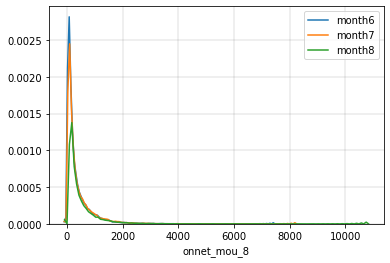

In [42]:
uni_2('onnet_mou_6','onnet_mou_7','onnet_mou_8')

here we can see that all kind of calls within the same operator network month 6 has maximum than month 7 and 8 and month 8 has lowest 

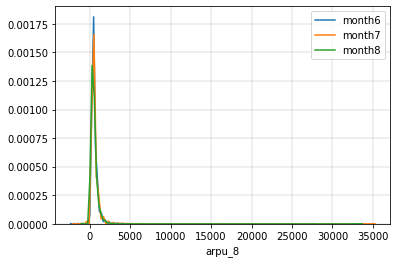

In [43]:
uni_2('arpu_6','arpu_7','arpu_8')

here we see that average revenue per user is maximum in the month of june and decrease every next month

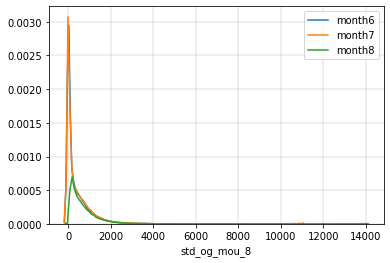

In [44]:
uni_2('std_og_mou_6','std_og_mou_7','std_og_mou_8')

here we see that std outgoing calls monthly usage in the month 7 is maximum but very low in the 8 month

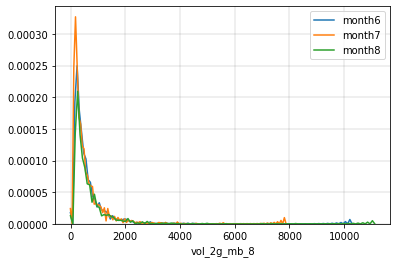

In [45]:
uni_2('vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

mobile internet usage volume in mb in 2G network usage is maximum in july but drop in august

##  Bivariate Analysis for churn and non churn customer

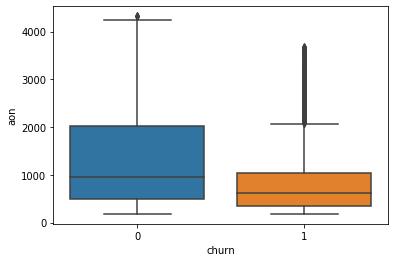

In [46]:
sns.boxplot(x=df['churn'], y='aon',  data=df)
plt.show()

so we can see that the customer who is more time  on the network is non churn customer and customer which spent less time time is churn customer

In [47]:
def bi_nc(var1,var2,var3):
    plt.figure(figsize = (15, 5))
    plt.subplot(1,3,1)
    sns.boxplot(x=df['churn'], y=var1,  data=df)
    plt.subplot(1,3,2)
    sns.boxplot(x=df['churn'], y=var2,  data=df)
    plt.subplot(1,3,3)
    sns.boxplot(x=df['churn'], y=var3,  data=df)
    plt.show()

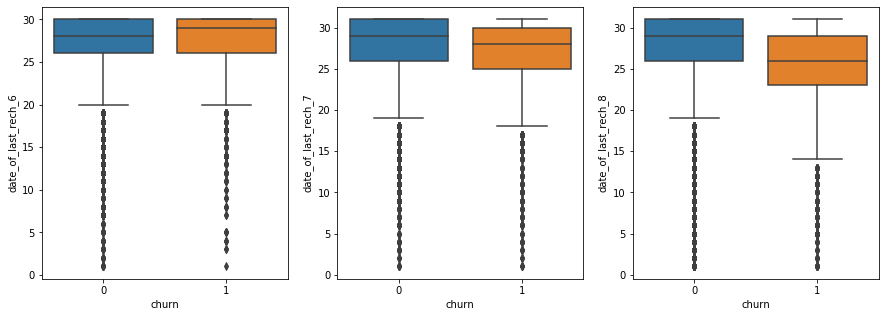

In [48]:
bi_nc('date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8')

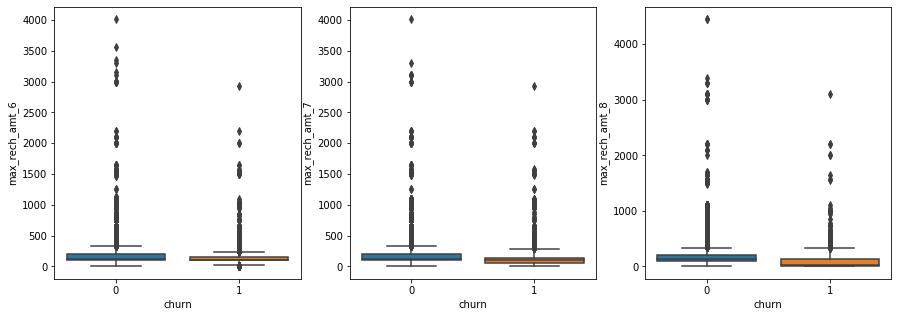

In [49]:
bi_nc('max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

in all 3 months customer who done maximum recharge amount in local currency are not churn 

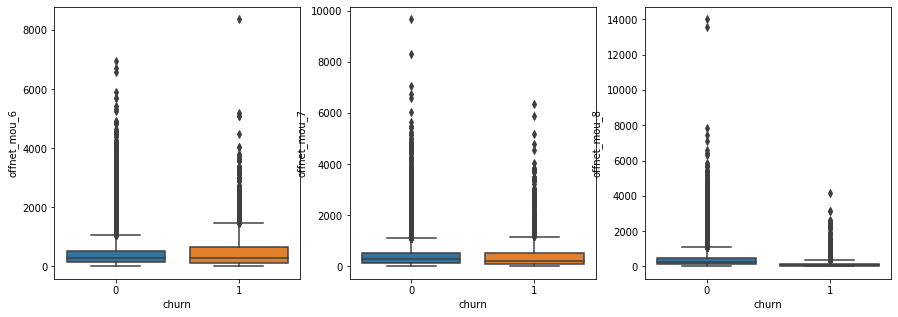

In [50]:
bi_nc('offnet_mou_6','offnet_mou_7','offnet_mou_8')

1.In month 6 all kinds of call outside network has more churn customer 

2.In month 7 it is approximately equal 

3.In month 8 increase in the non churn customer 

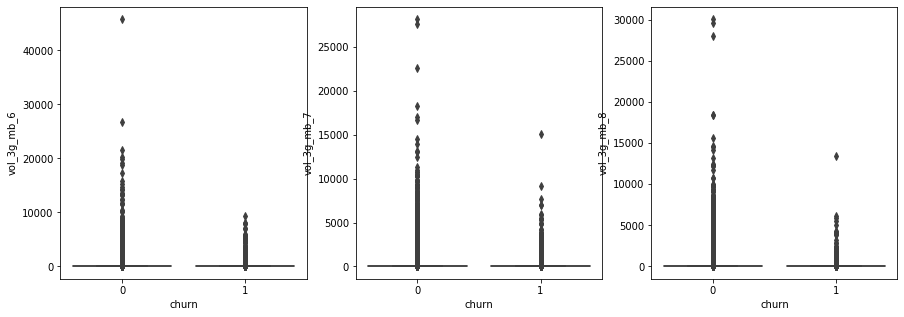

In [51]:
bi_nc('vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')

as it does not give much inference as they all seems to be look equal

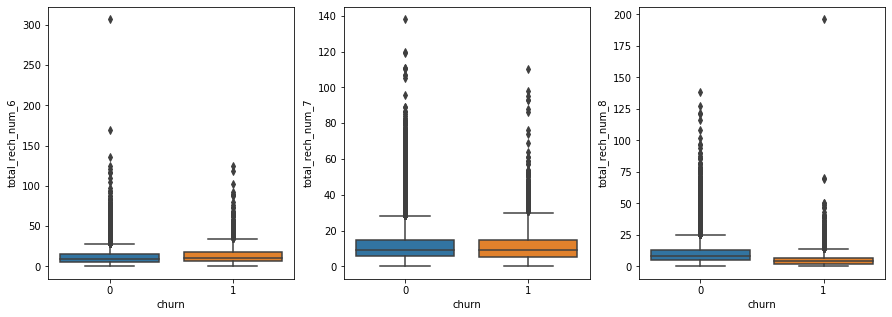

In [52]:
bi_nc('total_rech_num_6','total_rech_num_7','total_rech_num_8')

1. In month 6 total recharge number has approx equal churn and non churn customer

2. in month 7 75 percentile of churn customer is more 

3. in month 8 non churn customer are more who recharge their number more 

## Correlation Matrix


In [53]:
#Removing the mobile_number and date columns
df_numeric = df.drop(['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
df_numeric.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,39.97,46.08,69.70,850.04,889.14,443.83
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,0.00,0.00,0.00,459.52,312.01,78.83
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,0,31.51,179.50,73.55,420.89,79.59,609.25
16,430.975,29

In [54]:
churn_corr = df_numeric.corr()
churn_corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
arpu_6,1.000000,0.631581,0.570936,0.290943,0.142921,0.117495,0.458759,0.259494,0.212580,0.109162,0.069882,0.077812,0.176963,0.122399,0.107916,0.128893,0.086905,0.085803,0.276157,0.176642,0.156897,0.112236,0.082610,0.071729,0.045273,0.009153,4.786755e-03,0.268716,0.175743,0.160016,0.234329,0.100276,0.074959,0.262742,0.121483,0.085839,0.051461,0.037400,0.026049,0.338433,0.151682,0.108599,0.481277,0.432633,0.425466,0.113180,0.050398,0.023539,0.086704,0.023286,0.014705,0.502950,0.267321,0.210000,0.065990,0.039644,0.041800,0.149932,0.106549,0.089065,0.041390,0.025654,0.024964,0.145649,9.961030e-02,0.088666,0.074004,0.043102,0.040377,0.077290,0.041438,0.039144,0.024695,0.022107,0.015204,0.100483,0.057077,0.052542,0.188549,0.119397,0.104696,0.011835,-0.028108,-0.014938,0.114075,0.058845,0.058879,0.014150,0.023799,0.009025,0.330964,0.101415,0.086661,0.941256,0.608101,0.565462,0.313721,0.230572,0.257768,0.239042,0.168345,0.172094,0.030598,-0.001677,0.002541,0.216141,0.142724,0.147727,0.017231,-0.019382,-0.009707,0.001376,-0.026064,-0.024538,0.224394,0.126916,0.143128,0.046507,0.028326,0.023618,-0.006226,0.122959,0.123912,0.173104,0.066414,0.063513,0.164644,0.110816,0.107659,0.249846,0.166589,0.149412
arpu_7,0.631581,1.000000,0.740811,0.140758,0.269111,0.217189,0.275683,0.439471,0.340491,0.071475,0.081132,0.083953,0.108474,0.161861,0.137825,0.063780,0.120911,0.099512,0.149699,0.244012,0.197673,0.083753,0.112949,0.091904,0.006127,0.040592,3.131116e-02,0.143428,0.242776,0.195234,0.110402,0.220106,0.177942,0.148407,0.269900,0.201842,0.034626,0.057390,0.036018,0.176519,0.334406,0.255502,0.427520,0.522933,0.464600,0.055156,0.100860,0.053832,0.017109,0.025625,0.017318,0.275584,0.483248,0.367080,0.023508,0.056291,0.054196,0.072416,0.132344,0.108256,0.019586,0.034238,0.033683,0.066386,1.269466e-01,0.108215,0.041783,0.071038,0.075658,0.041844,0.080127,0.071011,0.022982,0.032474,0.026815,0.056895,0.101455,0.095449,0.090285,0.172867,0.147917,-0.015998,-0.004635,-0.009431,0.060793,0.100210,0.070617,0.003784,0.025246,0.014955,0.124813,0.289468,0.205353,0.638062,0.937114,0.737607,0.240686,0

## Outlier Treatment

In [55]:
# for checking outliers we use box plot 
# first we check the statistics description of numerical variables
df2 = df.drop(['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)
df2.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.395727,304.669619,268.61183,418.947465,424.850559,377.901545,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.806102,95.846947,87.506619,181.711608,181.679717,168.852659,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,283.633988,284.750474,263.225832,189.753131,199.877508,172.196408,203.139358,213.448614,179.672245,2.01076

In [56]:
def outlier(var):
    plt.figure(figsize=[10,3])
    sns.boxplot(var,data=df)
    plt.show()

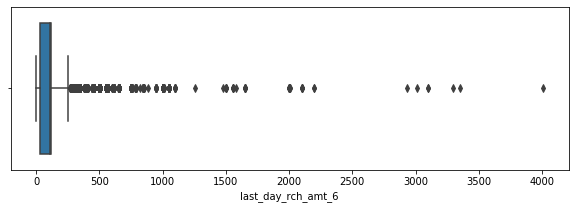

In [57]:
outlier('last_day_rch_amt_6')

here we can see that some outlier present in last_day_rch_amt 6

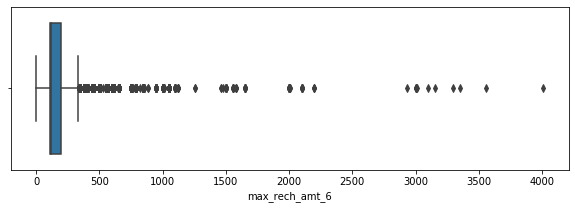

In [58]:
outlier('max_rech_amt_6')

here also outliers are present

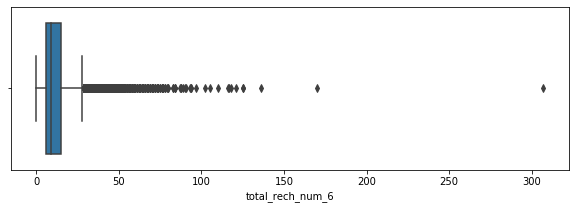

In [59]:
outlier('total_rech_num_6')

here there is one or two outlier is present

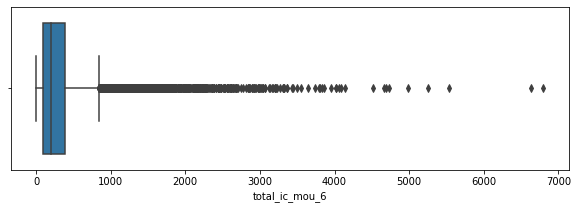

In [60]:
outlier('total_ic_mou_6')

here also some outliers are present

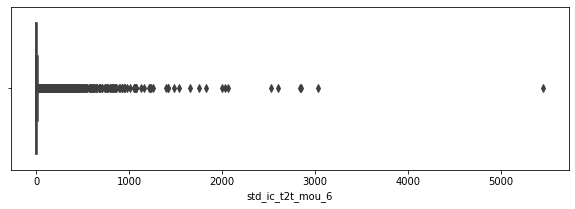

In [61]:
outlier('std_ic_t2t_mou_6')

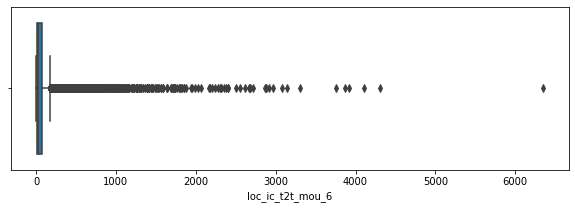

In [62]:
outlier('loc_ic_t2t_mou_6')

### Dummy Variable

In [63]:
df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27,25,26,0,0,779,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,39.97,46.08,69.70,850.04,889.14,443.83
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,25,31,30,50,0,10,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,0.00,0.00,0.00,459.52,312.01,78.83
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,20,

In [64]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['monthly_2g_6','monthly_2g_7','monthly_2g_8']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

### dropping the repeated varible

In [65]:
df = df.drop(['monthly_2g_6','monthly_2g_7','monthly_2g_8'],axis = 1)

In [66]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 136 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mobile_number        int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   onnet_mou_6          float64
 5   onnet_mou_7          float64
 6   onnet_mou_8          float64
 7   offnet_mou_6         float64
 8   offnet_mou_7         float64
 9   offnet_mou_8         float64
 10  roam_ic_mou_6        float64
 11  roam_ic_mou_7        float64
 12  roam_ic_mou_8        float64
 13  roam_og_mou_6        float64
 14  roam_og_mou_7        float64
 15  roam_og_mou_8        float64
 16  loc_og_t2t_mou_6     float64
 17  loc_og_t2t_mou_7     float64
 18  loc_og_t2t_mou_8     float64
 19  loc_og_t2m_mou_6     float64
 20  loc_og_t2m_mou_7     float64
 21  loc_og_t2m_mou_8     float64
 22  loc_og_t2f_mou_6     float64
 23  loc_og_t2f_mou_7     float64
 24  l

as we can see all columns are numeric so we can proceed further 

## Test-Train Split

In [67]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27,25,26,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,39.97,46.08,69.70,850.04,889.14,443.83
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,25,31,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,0.00,0.00,0.00,459.52,312.01,78.83
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,20,22,30,110,

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Putting feature variable to X
X = df.drop(['churn','mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,39.97,46.08,69.70,850.04,889.14,443.83
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0.00,0.00,0.00,459.52,312.01,78.83
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,31.51,179.50,73.55,420.89,79.59,609.25
16,430.975,299.869,187.89

In [70]:
# Putting response variable to y
y = df['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int32

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
X[:][:] = scaler.fit_transform(X[:][:])
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_roam_mou_6,total_roam_mou_7,total_roam_mou_8,total_loc_mou_6,total_loc_mou_7,total_loc_mou_8
7,1.088501,1.643402,5.356252,-0.517981,-0.519106,-0.464203,0.073401,0.292941,-0.109344,-0.014943,0.261694,0.246593,-0.047075,-0.096463,0.156158,-0.183346,-0.259857,-0.201315,0.507979,1.105038,-0.028081,2.433281,2.126868,2.311395,-0.227481,-0.201203,-0.231531,0.364997,0.663720,-0.020357,-0.452645,-0.412479,-0.390673,-0.370649,-0.414893,-0.313251,0.373216,1.351720,1.272653,-0.550985,-0.533918,-0.448105,-0.049315,-0.044442,0.178163,-0.076062,-0.321932,-0.016826,-0.303560,-0.017361,-0.017809,-0.301611,-0.145804,-0.398872,-0.067942,-0.228457,-0.251607,0.258754,0.274332,-0.158629,2.980044,1.716856,0.567328,0.586004,0.338721,-0.161106,0.261988,-0.059791,0.211764,0.587707,0.883682,1.052640,2.474666,1.523431,0.963485,0.920804,0.802190,1.033225,0.883137,0.657827,0.369969,0.737474,-0.099296,-0.237277,-0.135250,0.028183,0.265446,1.040354,0.890102,1.078557,5,5,7,1580,790,3638,1580,790,1580,0,0,779,-0.284238,-0.278858,-0.257772,-0.298313,-0.325002,-0.314057,0,0,0,0,0,0,0,0,0,0,0,0,802,-0.183623,-0.283682,-0.263319,-0.13493,-0.037597,0.067329,0.218074,0.544692,0.608956,-0.098911
8,-0.471101,-0.209364,-0.807505,0.254684,0.096268,-0.501134,-0.690293,-0.708570,-0.507738,-0.219993,-0.177217,-0.177815,-0.247297,-0.225033,-0.202077,0.854414,0.490729,-0.319777,-0.403249,-0.462060,-0.505476,-0.307932,-0.314198,-0.321188,-0.227481,-0.201203,0.735019,0.248879,0.009136,-0.548035,-0.178646,-0.155210,-0.364894,-0.458202,-0.464491,-0.249536,-0.161414,-0.152375,-0.152966,-0.436543,-0.426695,-0.414925,-0.049315,-0.048388,-0.045303,-0.317724,-0.321932,0.146106,-0.303560,-0.017361,-0.017809,-0.270067,-0.405023,-0.659232,-0.284235,-0.362505,-0.425226,-0.463033,-0.672856,-0.648099,-0.340546,-0.333898,-0.337169,-0.523757,-0.713795,-0.725435,-0.205797,-0.192629,-0.206422,-0.095042,-0.278054,-0.283487,-0.144244,-0.145919,-0.132266,-0.204690,-0.326959,-0.337853,-0.563893,-0.774751,-0.773960,-0.343498,-0.099296,-0.237277,-0.165878,-0.160541,-0.156162,-0.084995,-0.095863,-0.096027,19,21,14,437,601,120,90,154,30,50,0,10,-0.284238,0.991087,-0.257660,-0.298313,0.552616,-0.300161,0,1,0,0,1,3,0,0,0,0,0,0,315,-0.277637

In [74]:
### Checking the Churn Rate
churn = (sum(df['churn'])/len(df['churn'].index))*100
churn

8.64016527273333

In [75]:
df.shape

(30011, 136)

### Train-test split

In [76]:
# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
type(X_train)

pandas.core.frame.DataFrame

In [78]:
type(y_train)

pandas.core.series.Series

## Model building

In [79]:
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE


In [80]:
smt = SMOTE(random_state=42)

In [81]:
X_train,y_train = smt.fit_resample(X_train,y_train)

#### Running Your First Training Model

In [82]:
import statsmodels.api as sm

In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38242
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12864.
Date:                Mon, 01 Mar 2021   Deviance:                       25729.
Time:                        22:41:04   Pearson chi2:                 3.29e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5429      0.193      7.996      0.000       1.165       1.921
arpu_6                -0.0607      0.071     -0.850      0.395      -0.201       0.079
arpu_7                 0.5686      0.083      6.822      0.000       0.405       0.732
arpu_8                 1.1841      0.103     11.467      0.000       0.982       1.386
onnet_mou_6           -3.1458      1.818     -1.730      0.084      -6.709       0.417
onnet_mou_7           -3.3616      1.348     -2.493      0.013      -6.004      -0.719
onnet_mou_8            4.1571      1.226      3.392      0.001       1.755       6.559
offnet_mou_6          -2.1381      1.837     -1.164      0.245      -5.739       1.463
offnet_mou_7          -3.8988      1.321     -2.951      0.003      -6.488      -1.310
offnet_mou_8           2.3690      1.218      1.945      0.052      -0.018       4.756
roam_ic_mou_6         -0.1100      0.086     -1.279      0.201      -0.279       0.059
roam_ic_mou_7         -0.0733      0.058     -1.270      0.204      -0.186       0.040
roam_ic_mou_8          0.1571      0.057      2.735      0.006       0.044       0.270
roam_og_mou_6          0.4626      0.342      1.353      0.176      -0.207       1.133
roam_og_mou_7          0.5950      0.206      2.892      0.004       0.192       0.998
roam_og_mou_8         -0.4540      0.202     -2.246      0.025      -0.850      -0.058
loc_og_t2t_mou_6    1442.3328    746.419      1.932      0.053     -20.622    2905.287
loc_og_t2t_mou_7     229.3228    767.657      0.299      0.765   -1275.257    1733.902
loc_og_t2t_mou_8    6502.1767    755.602      8.605      0.000    5021.225    7983.128
loc_og_t2m_mou_6    1520.8838    787.560      1.931      0.053     -22.706    3064.474
loc_og_t2m_mou_7     222.2009    744.012      0.299      0.765   -1236.035    1680.437
loc_og_t2m_mou_8    6489.3974    753.900      8.608      0.000    5011.781    7967.014
loc_og_t2f_mou_6     138.1542     71.446      1.934      0.053      -1.878     278.186
loc_og_t2f_mou_7      20.6991     69.898      0.296      0.767    -116.299     157.697
loc_og_t2f_mou_8     560.6234     65.130      8.608      0.000     432.971     688.275
loc_og_t2c_mou_6      -0.0350      0.019     -1.879      0.060      -0.072       0.002
loc_og_t2c_mou_7       0.0837      0.025      3.355      0.001       0.035       0.133
loc_og_t2c_mou_8       0.0046      0.027      0.170      0.865      -0.049       0.058
loc_og_mou_6       -2582.5532   1112.015     -2.322      0.020   -4762.063    -403.043
loc_og_mou_7        -732.9023   1128.203     -0.650      0.516   -2944.140    1478.335
loc_og_mou_8       -4194.8671   1150.571     -3.646      0.000   -6449.946   -1939.789
std_og_t2t_mou_6   -1845.4993   1470.356     -1.255      0.209   -4727.344    1036.345
std_og_t2t_mou_7   -3130.9090   1569.4

###  Feature Selection Using RFE

In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [87]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 74),
 ('arpu_7', False, 33),
 ('arpu_8', False, 72),
 ('onnet_mou_6', False, 40),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 95),
 ('offnet_mou_6', False, 91),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 52),
 ('roam_ic_mou_6', False, 81),
 ('roam_ic_mou_7', False, 41),
 ('roam_ic_mou_8', False, 84),
 ('roam_og_mou_6', False, 79),
 ('roam_og_mou_7', False, 86),
 ('roam_og_mou_8', False, 51),
 ('loc_og_t2t_mou_6', False, 76),
 ('loc_og_t2t_mou_7', False, 8),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 11),
 ('loc_og_t2m_mou_7', False, 25),
 ('loc_og_t2m_mou_8', False, 35),
 ('loc_og_t2f_mou_6', False, 59),
 ('loc_og_t2f_mou_7', False, 99),
 ('loc_og_t2f_mou_8', False, 37),
 ('loc_og_t2c_mou_6', False, 68),
 ('loc_og_t2c_mou_7', False, 58),
 ('loc_og_t2c_mou_8', False, 80),
 ('loc_og_mou_6', False, 48),
 ('loc_og_mou_7', False, 89),
 ('loc_og_mou_8', False, 34),
 ('std_og_t2t_mou_6', False, 96),
 ('std_og_t2t_mou_7', True, 1),
 ('std_o

In [89]:
col = X_train.columns[rfe.support_]

In [90]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_roam_mou_6', 'total_roam_mou_7', 'total_roam_mou_8', 'total_loc_mou_6', 'total_loc_mou_7', 'total_loc_mou_8'], dtype='object', length=111)

##### Assessing the model with StatsModels

In [91]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1000000000.0)

In [92]:
#Re-running the model with the selected features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38347
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15030.
Date:                Mon, 01 Mar 2021   Deviance:                       30060.
Time:                        22:45:49   Pearson chi2:                 7.80e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0906      0.025    -43.259      0.000      -1.140      -1.041
onnet_mou_7          1.4318      0.079     18.179      0.000       1.277       1.586
offnet_mou_7         0.5928      0.021     28.641      0.000       0.552       0.633
loc_og_t2t_mou_8    -1.4807      0.089    -16.621      0.000      -1.655      -1.306
std_og_t2t_mou_7    -0.7243      0.074     -9.770      0.000      -0.870      -0.579
total_og_mou_8      -1.1902      0.033    -36.365      0.000      -1.254      -1.126
loc_ic_t2t_mou_8     1.1695      0.163      7.154      0.000       0.849       1.490
loc_ic_t2m_mou_8     1.0431      0.230      4.536      0.000       0.592       1.494
loc_ic_mou_6         3.8830      0.400      9.712      0.000       3.099       4.667
loc_ic_mou_8         8.6918      0.420     20.708      0.000       7.869       9.514
std_ic_mou_6         1.8621      0.183     10.190      0.000       1.504       2.220
std_ic_mou_8         4.9071      0.157     31.255      0.000       4.599       5.215
total_ic_mou_6      -4.0725      0.459     -8.869      0.000      -4.973      -3.173
total_ic_mou_8     -13.8435      0.382    -36.270      0.000     -14.592     -13.095
isd_ic_mou_6         0.9257      0.093      9.984      0.000       0.744       1.107
isd_ic_mou_8         2.7802      0.087     31.980      0.000       2.610       2.951
monthly_2g_6        -1.3524      0.105    -12.833      0.000      -1.559      -1.146
monthly_2g_7        -0.7606      0.092     -8.285      0.000      -0.941      -0.581
monthly_2g_8        -2.0576      0.157    -13.079      0.000      -2.366      -1.749
monthly_3g_8        -1.9446      0.086    -22.666      0.000      -2.113      -1.776
sep_vbc_3g          -0.6333      0.076     -8.367      0.000      -0.782      -0.485
====================================================================================
"""

In [93]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.455272
1    0.002329
2    0.348863
3    0.498315
4    0.464092
5    0.185639
6    0.342441
7    0.019572
8    0.014937
9    0.155791
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45527205, 0.00232945, 0.34886297, 0.49831484, 0.46409175,
       0.18563908, 0.34244093, 0.01957234, 0.01493685, 0.15579123])

In [95]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.585573
1,0.901523
2,0.013457
3,0.349861
4,0.000370


In [96]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
29360,0
49979,0
90612,0
87007,0
91852,0


In [97]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 

In [99]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns

In [100]:
y_pred_final.head()

,churn,Churn_Prob
0,0,0.585573
1,0,0.901523
2,0,0.013457
3,0,0.349861
4,0,0.000370


In [101]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,churn,Churn_Prob,predicted
0,0,0.585573,1
1,0,0.901523,1
2,0,0.013457,0
3,0,0.349861,0
4,0,0.000370,0


In [102]:
from sklearn import metrics

In [103]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6884, 1350],
       [ 134,  636]], dtype=int64)

In [104]:
##Actual/Predicted     not_churn    churn
        # not_churn        6884      1350
        # churn            134       636 

In [105]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.8351843625055531

## ROC

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

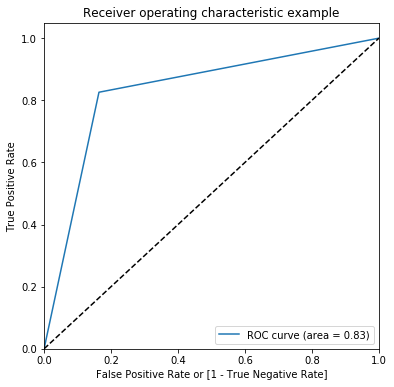

(array([0.        , 0.16395434, 1.        ]),
 array([0.        , 0.82597403, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [107]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [108]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.89'

We see an overall AUC score of 0.83 which is good

### Using Decision Trees

In [109]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train,y_train_ = smt.fit_resample(X_train,y_train)

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dt_base = DecisionTreeClassifier(random_state=100, max_depth=6)

In [112]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=100)

In [113]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8234
           1       0.38      0.77      0.51       770

    accuracy                           0.87      9004
   macro avg       0.68      0.83      0.72      9004
weighted avg       0.93      0.87      0.89      9004



In [116]:
from sklearn.metrics import plot_roc_curve

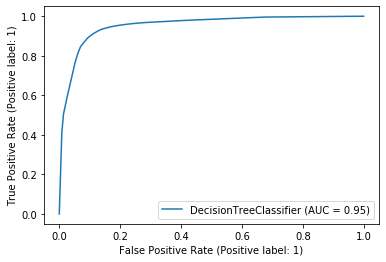

In [117]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
dt = DecisionTreeClassifier(random_state=42)

In [120]:
params = {
    "max_depth": [2,3,5,10,20,50],
    "min_samples_leaf": [5,10,20,50,100,500,1000]
}

In [121]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=6,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [122]:
%%time
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 42 candidates, totalling 252 fits
Wall time: 3min 15s


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 1000]},
             scoring='accuracy', verbose=1)

In [123]:
grid_search.best_score_

0.9084139099978813

In [124]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

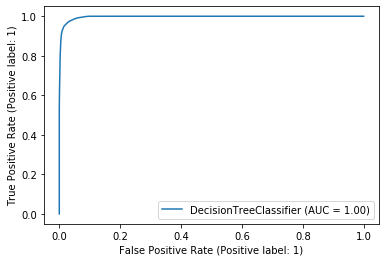

In [125]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

### Using Random forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier(n_estimators = 13,max_depth = 6, max_features = 7,random_state=  100,oob_score = True)

In [128]:
%%time
rf.fit(X_train,y_train)

Wall time: 2.57 s


RandomForestClassifier(max_depth=6, max_features=7, n_estimators=13,
                       oob_score=True, random_state=100)

In [129]:
rf.oob_score_

0.8799781067556297

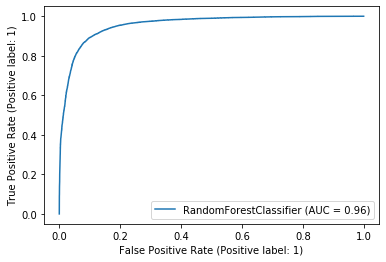

In [130]:
plot_roc_curve(rf,X_train,y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [131]:
rf = RandomForestClassifier(random_state=42, 
                            n_jobs=-1)

In [132]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [133]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [134]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 11min 46s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [135]:
grid_search.best_score_

0.9370308590492076

In [136]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

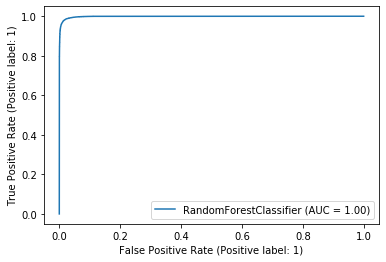

In [137]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [138]:
rf_best.feature_importances_

array([3.90354527e-03, 4.84639741e-03, 5.71672233e-02, 3.10350917e-03,
       4.41037338e-03, 8.75746342e-03, 2.69358055e-03, 3.89221432e-03,
       9.72866659e-03, 2.45098490e-03, 1.42153430e-02, 5.41527185e-02,
       2.44995575e-03, 1.12629024e-02, 6.77380889e-02, 3.43228704e-03,
       3.19574368e-03, 1.31780824e-02, 3.14865743e-03, 4.08317850e-03,
       2.09665272e-02, 1.77637454e-03, 2.06697515e-03, 3.12595798e-03,
       2.05468856e-03, 4.26503103e-03, 1.48591571e-03, 3.02173913e-03,
       3.93960213e-03, 2.76335520e-02, 6.33273465e-03, 7.49045667e-03,
       3.25321401e-03, 4.25160759e-03, 4.21053817e-03, 5.66164256e-03,
       8.85138085e-04, 7.53123174e-04, 7.01846737e-04, 5.68746538e-03,
       4.50322210e-03, 5.89529814e-03, 1.34014510e-03, 2.36312098e-03,
       2.14593869e-03, 4.27635042e-03, 7.99458905e-03, 2.55533626e-03,
       2.83718243e-03, 5.37424989e-05, 4.11536765e-05, 2.97764628e-03,
       3.47806470e-03, 3.14592126e-02, 2.89981249e-03, 3.17669995e-03,
      

In [139]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [140]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
14,roam_og_mou_8,0.067738
127,total_roam_mou_8,0.063516
2,arpu_8,0.057167
80,total_ic_mou_8,0.055478
11,roam_ic_mou_8,0.054153
95,total_rech_amt_8,0.052398
101,last_day_rch_amt_8,0.044948
98,max_rech_amt_8,0.042604
53,total_og_mou_8,0.031459
29,loc_og_mou_8,0.027634



## Model building (with PCA)

### PCA on the data

In [142]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train,y_train_ = smt.fit_resample(X_train,y_train)

In [143]:
X_train.shape

(38368, 131)

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(random_state=100)

In [146]:
pca.fit(X_train)

PCA(random_state=100)

In [147]:
#Components from PCA
pca.components_

array([[ 3.45622029e-05,  1.29617280e-04,  2.53641235e-04, ...,
         2.19340841e-04,  2.50090411e-04,  2.77172769e-04],
       [ 8.39833224e-04,  1.13122732e-03,  9.72097135e-04, ...,
         1.70704673e-04,  2.65220533e-04,  2.58315625e-04],
       [-1.46303314e-03,  4.57478130e-04,  4.31085145e-04, ...,
        -3.65855899e-04,  1.01289343e-04,  1.59959603e-04],
       ...,
       [ 0.00000000e+00,  4.59197399e-16,  5.42874566e-16, ...,
        -2.29756213e-01,  4.32353598e-01, -5.90798039e-01],
       [-0.00000000e+00,  4.99721400e-16,  7.00102725e-15, ...,
        -5.89284819e-02, -2.60587529e-01, -1.31570172e-01],
       [ 0.00000000e+00, -5.20495998e-16, -1.64243952e-14, ...,
        -3.96339550e-02, -6.03490341e-03,  9.17920680e-03]])

In [148]:
pca.explained_variance_ratio_

array([4.51320352e-01, 3.00967855e-01, 1.13878861e-01, 7.59974417e-02,
       3.06601575e-02, 8.54355399e-03, 6.81405686e-03, 5.11100930e-03,
       3.73145062e-03, 2.83722936e-03, 6.26773187e-05, 1.65165255e-05,
       8.70428547e-06, 5.00744171e-06, 4.25003967e-06, 3.64535908e-06,
       3.17304137e-06, 2.51241376e-06, 2.33628383e-06, 2.16663910e-06,
       1.45582129e-06, 1.31109251e-06, 1.21295811e-06, 1.20615247e-06,
       1.03569667e-06, 1.01341787e-06, 9.16846213e-07, 8.75826226e-07,
       8.28939616e-07, 7.82384555e-07, 7.36513163e-07, 6.95574310e-07,
       6.60161065e-07, 6.31354640e-07, 5.92282203e-07, 5.79053919e-07,
       5.69884619e-07, 5.44390158e-07, 5.08630177e-07, 4.86071838e-07,
       4.83514810e-07, 4.67275767e-07, 4.46817246e-07, 4.36809310e-07,
       4.22147978e-07, 3.95700699e-07, 3.85747808e-07, 3.40870221e-07,
       3.32173402e-07, 3.16719054e-07, 3.05922946e-07, 2.95261990e-07,
       2.71659963e-07, 2.61182729e-07, 2.57505085e-07, 2.49337911e-07,
      

In [149]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative variance explained')

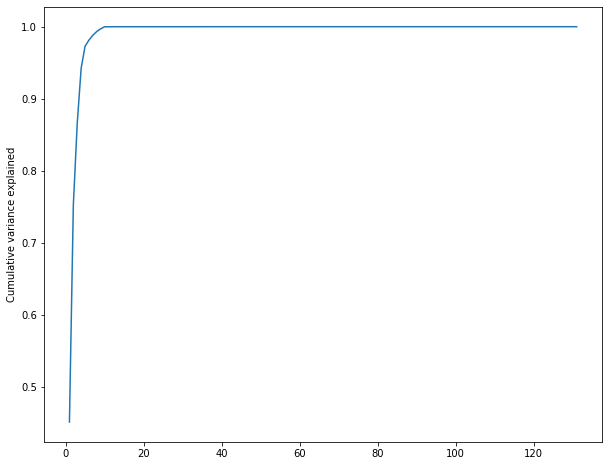

In [150]:
fig = plt.figure(figsize=[10,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.ylabel("Cumulative variance explained")

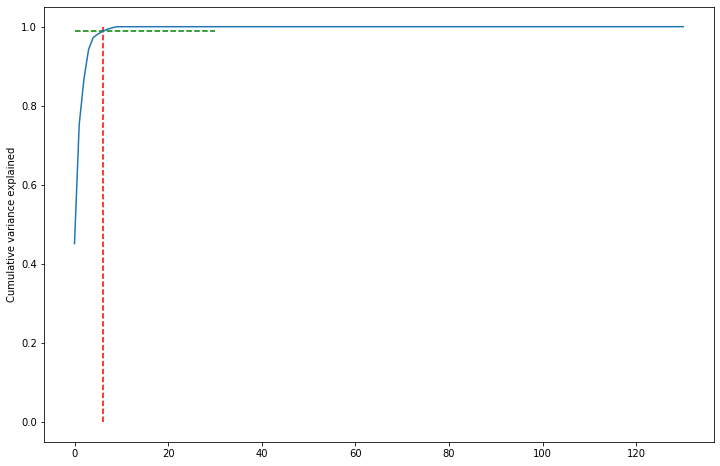

In [151]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.989, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [152]:
from sklearn.decomposition import IncrementalPCA

In [153]:
pca_final = IncrementalPCA(n_components=7)

In [154]:
df_train_pca = pca_final.fit_transform(X_train)

In [155]:
df_train_pca.shape

(38368, 7)

In [156]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [157]:
corrmat.shape

(7, 7)

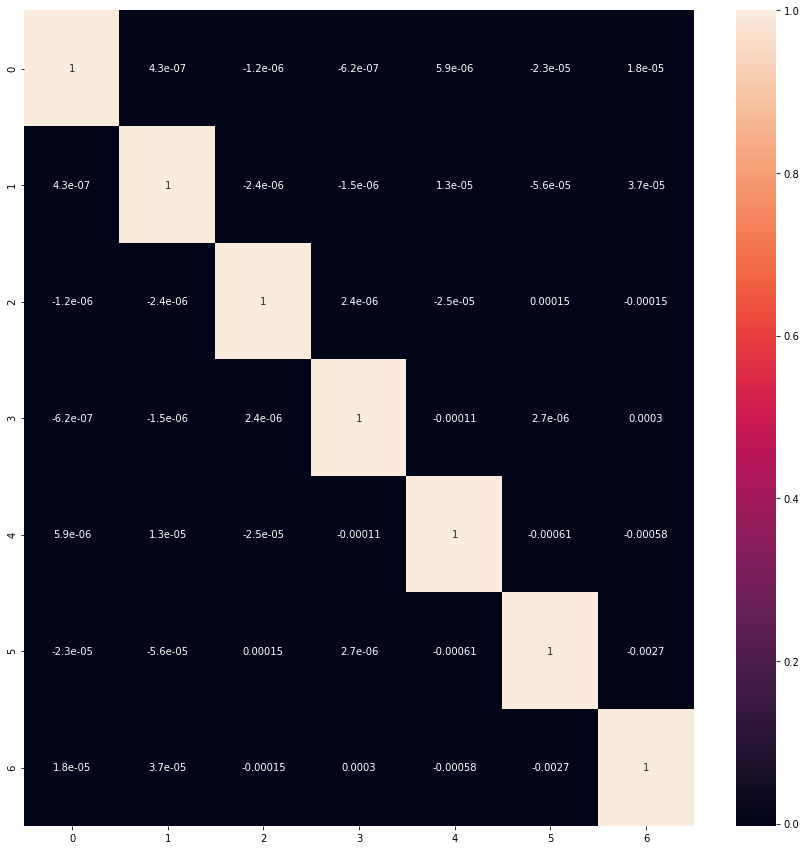

In [158]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [159]:
#Applying tranformation on the data set
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 7)

### Applying logistic regression on the data on our Principal components(Model-1)

In [160]:
from sklearn.linear_model import LogisticRegression


In [161]:
learner_pca = LogisticRegression()

In [162]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [163]:
#Making predictions on the test set
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [164]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

In [165]:
#Making it a little more unsupervised
pca_again = PCA(0.95)

In [166]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [167]:
df_train_pca2.shape

(38368, 5)

In [168]:
#Foloowing it up with regression model
learner_pca2 = LogisticRegression()

In [169]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [170]:
df_test_pca2 = pca_again.transform(X_test)


In [171]:
df_test_pca2.shape

(9004, 5)

In [172]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [173]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

We got a ROC AUC score of 0.83

### Applying Decision Tree on the data on our Principal components(Model-2)

In [174]:
dt_base1 = DecisionTreeClassifier(random_state=42, max_depth=4)

In [175]:
dt_base1.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [176]:
y_train_pred1 = dt_base1.predict(df_train_pca)
y_test_pred1 = dt_base1.predict(df_test_pca)

In [177]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8234
           1       0.25      0.70      0.37       770

    accuracy                           0.80      9004
   macro avg       0.61      0.75      0.63      9004
weighted avg       0.91      0.80      0.84      9004



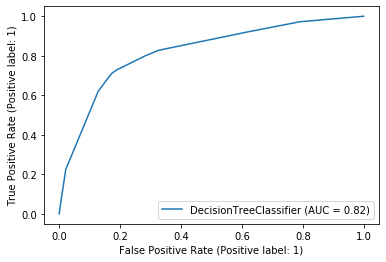

In [178]:
plot_roc_curve(dt_base1, df_train_pca, y_train, drop_intermediate=False)
plt.show()

In [179]:
#### Hyper-parameter tuning for the Decision Tree

In [180]:
dt1 = DecisionTreeClassifier(random_state=42)

In [181]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [182]:
grid_search1 = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [183]:
%%time
grid_search1.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 7.31 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [184]:
grid_search1.best_score_

0.8466430358632193

In [185]:
dt_best1 = grid_search1.best_estimator_
dt_best1

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

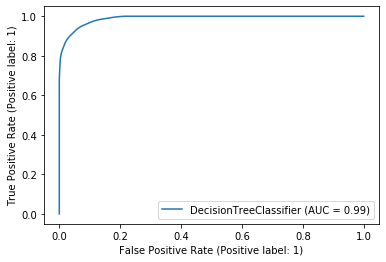

In [186]:
plot_roc_curve(dt_best1, df_train_pca, y_train)
plt.show()

In [187]:
#Making predictions on the test set
pred_probs_test2 = model_pca.predict_proba(df_test_pca)

In [188]:
### Applying random forest on the data on our Principal components(Model-3)

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf = RandomForestClassifier(n_estimators = 13,max_depth = 6, max_features = 7,random_state=  100,oob_score = True)

In [191]:
%%time
rf.fit(df_train_pca,y_train)

Wall time: 3.26 s


RandomForestClassifier(max_depth=6, max_features=7, n_estimators=13,
                       oob_score=True, random_state=100)

In [192]:
rf.oob_score_

0.789095079232694

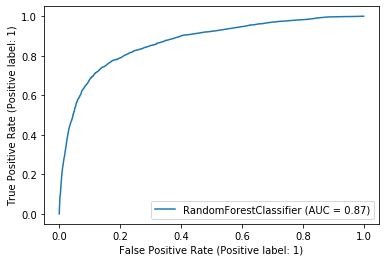

In [193]:
plot_roc_curve(rf,df_train_pca,y_train)
plt.show()

In [194]:
#### Hyper-parameter tuning for the Random Forest

In [195]:
rf = RandomForestClassifier(random_state=42, 
                            n_jobs=-1)

In [196]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [197]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [198]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 4min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [199]:
grid_search.best_score_

0.8908204753961635

In [200]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

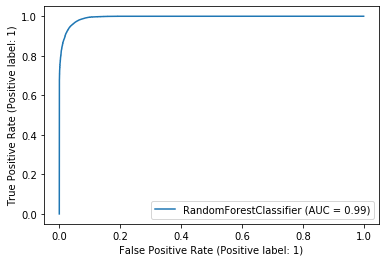

In [201]:
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

In [202]:
rf_best.feature_importances_

array([0.18212179, 0.12454548, 0.14436584, 0.28084493, 0.10049475,
       0.07362681, 0.09400039])

In [225]:

rf_best.feature_importances_.shape

(7,)

In [226]:

from sklearn.metrics import roc_curve
proba = rf_best.predict_proba(df_test_pca)
preds = proba[:,1]

In [227]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [228]:

roc_auc = metrics.auc(fpr, tpr)

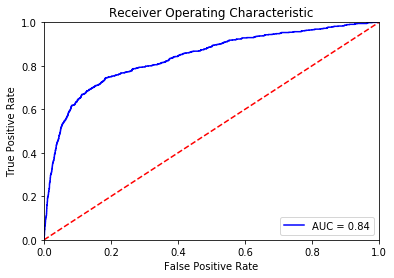

In [229]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

we got AUC score of 0.84 which good for model

## Final Recommendations

1. Average revenue per user per customer(arpu) is an important factor to predict churn.

2. Incoming/Outgoing roaming monthly usage of month August is also an important factor to predict churn. 

3. onnet_monthly_usage and offnet_monthly usage are also important factors to predict churn

4. cutomers who are in between 2-4 years with the operator are the most likely to churn

5. 2g/3g services are also an indicator of churn as where the service is not good customers more likely to churn 

6. Random Forest is the most accurate and reliable model among the others.
